In [64]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

Exploratory Data Analysis

In [66]:
data = pd.read_csv('C:/Users/lamia/Desktop/spam.csv')
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [44]:
data.shape

(4601, 58)

In [45]:
#Vérification des valeurs manquantes
data.apply(lambda x:sum(x.isnull()), axis=0)

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [67]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [47]:
# On effectue une séparation des données en utilisant la variable spam comme variable cible
X= data.drop('spam', axis=1)
y = data['spam']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [48]:
#Diviser le dataset en set d'entrainement, de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [50]:
# On utilise la régression logistique de scikit-learn
# pour prédire la variable 'spam' en fonction des autres variables, avec un modèle sans pénalité et en utilisant le solveur 'newton-cg'
from sklearn.linear_model import LogisticRegression
x = data.drop('spam', axis=1)
y = data['spam']
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(x,y)

C:\Users\lamia\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

In [51]:
# on ajoute une colonne pour la constante
x_stat = sm.add_constant(x)
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                  0.7057
Time:                        21:48:03   Log-Likelihood:                -907.88
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5686      0.142    -11.044      0.000      -1.847      -1.290
word_freq_make                -0.3895      0.231     -1.683      0.092      -0.843       0.064
word_freq_address             -0.1458      0.069     -2.104      0.035      -0.282      -0.010
word_freq_all                  0.1141      0.110      1.035      0.301      -0.102       0.330
word_freq_3d                   2.2515      1.507      1.494      0.135      -0.702       5.205
word_freq_our                  0.5624      0.102      5.524      0.000       0.363       0.762
word_freq_over                 0.8830      0.250      3.534      0.000       0.393       1.373
word_freq_remove               2.2785      0.333      6.846      0.000       1.626       2.931
word_freq_internet             0.5696      0.168      3.387      0.001       0.240       0.899
word_freq_order                0.7343      0.285      2.577      0.010       0.176       1.293
word_freq_mail                 0.1275      0.073      1.755      0.079      -0.015       0.270
word_freq_receive             -0.2557      0.298     -0.858      0.391      -0.840       0.328
word_freq_will                -0.1383      0.074     -1.868      0.062      -0.283       0.007
word_freq_people              -0.0796      0.230     -0.346      0.730      -0.531       0.372
word_freq_report               0.1447      0.136      1.061      0.289      -0.123       0.412
word_freq_addresses            1.2362      0.725      1.704      0.088      -0.186       2.658
word_freq_free                 1.0386      0.146      7.128      0.000       0.753       1.324
word_freq_business             0.9599      0.225      4.264      0.000       0.519       1.401
word_freq_email                0.1203      0.117      1.027      0.305      -0.109       0.350
word_freq_you                  0.0813      0.035      2.320      0.020       0.013       0.150
word_freq_credit               1.0474      0.538      1.946      0.052      -0.008       2.102
word_freq_your                 0.2419      0.052      4.615      0.000       0.139       0.345
word_freq_font                 0.2013      0.163      1.238      0.216      -0.117       0.520
word_freq_000                  2.2452      0.471      4.762      0.000       1.321       3.169
word_freq_money                0.4264      0.162      2.630      0.009       0.109       0.744
word_freq_hp                  -1.9204      0.313     -6.139      0.000      -2.534      -1.307
word_freq_hpl                 -1.0402      0.440     -2.366      0.018      -1.902      -0.179
word_freq_george             -11.7672      2.113     -5.569      0.000     -15.909      -7.626
word_freq_650                  0.4454      0.199      2.237      0.025       0.055       0.836
word_freq_lab                 -2.4864      1.502     -1.656      0.098      -5.429       0.457
word_freq_labs                -0.3299      0.314     -1.052      0.293      -0.945       0.285
word_freq_t

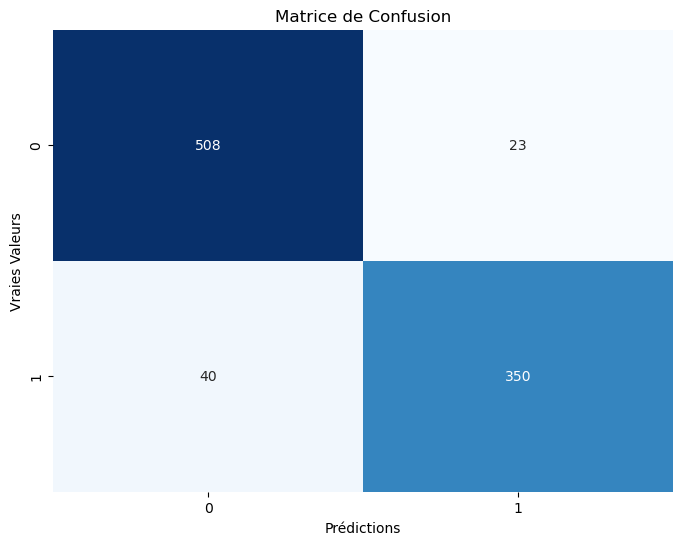

In [52]:
# On fait des prédictions sur l'ensemble de test
y_pred = modele_logit.predict(X_test)

# Pour la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Valeurs")
plt.show()

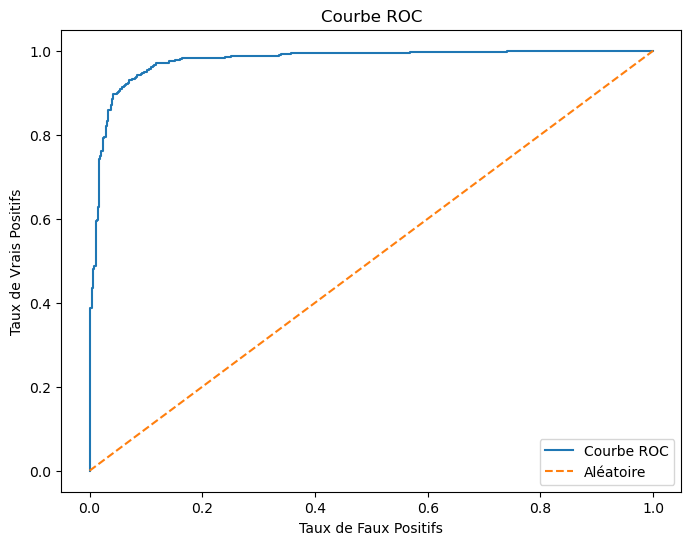

In [53]:
# On calcule les probabilités des classes positives
y_prob = modele_logit.predict_proba(X_test)[:, 1]

# On calcule le taux de faux positifs et le taux de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# On trace la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Courbe ROC")
plt.plot([0, 1], [0, 1], linestyle="--", label="Aléatoire")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.show()

Random Forest

In [54]:
#Randomized search pour optimiser les hyperparamètres
model = RandomForestClassifier(random_state=42)

params = {'n_estimators': sp_randint(50,400),
          'max_features' :  ['auto', 'sqrt', 'log2'],
          'max_depth' : sp_randint(2, 30),
          'min_samples_split' : sp_randint(2, 10),
          'min_samples_leaf' : sp_randint(1, 5)}

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter= 50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X_train,y_train)
best_rf_model = random_search.best_estimator_

In [55]:
print("Meilleurs hyperparamètres", random_search.best_params_)

Meilleurs hyperparamètres {'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


In [56]:
# instance of random forest classifier
RF = RandomForestClassifier(**random_search.best_params_,random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=28, max_features='log2', min_samples_split=4,
                       n_estimators=150, random_state=42)

In [57]:
# model evaluation for training set
y_train_predict = RF.predict(X_train)
acc_train = accuracy_score(y_train, y_train_predict)
print ('RF accuracy for training is ' + str(acc_train))

# Model evaluation for the testing set
y_test_predict = RF.predict(X_test)
acc_test = accuracy_score(y_test, y_test_predict)
print('RF accuracy score for testing is ' + str(acc_test))


RF accuracy for training is 0.9945652173913043
RF accuracy score for testing is 0.9619978284473398


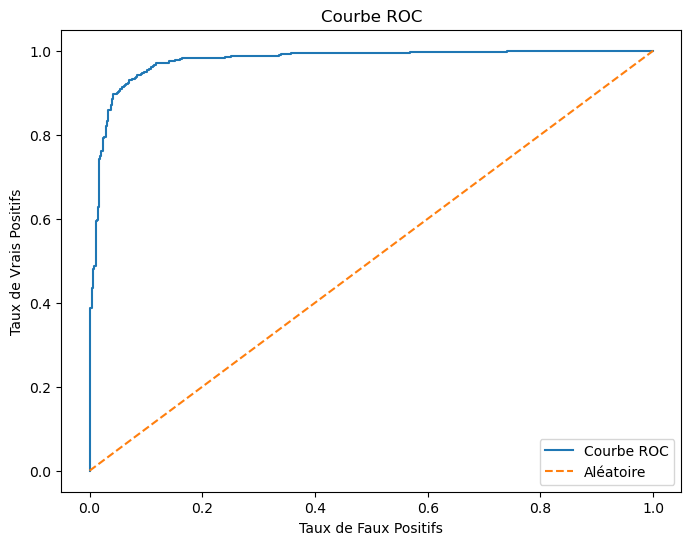

In [58]:
# On calcule les probabilités des classes positives
y_prob = modele_logit.predict_proba(X_test)[:, 1]

# On calcule le taux de faux positifs et le taux de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# On trace la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Courbe ROC")
plt.plot([0, 1], [0, 1], linestyle="--", label="Aléatoire")
plt.title("Courbe ROC")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.legend()
plt.show()


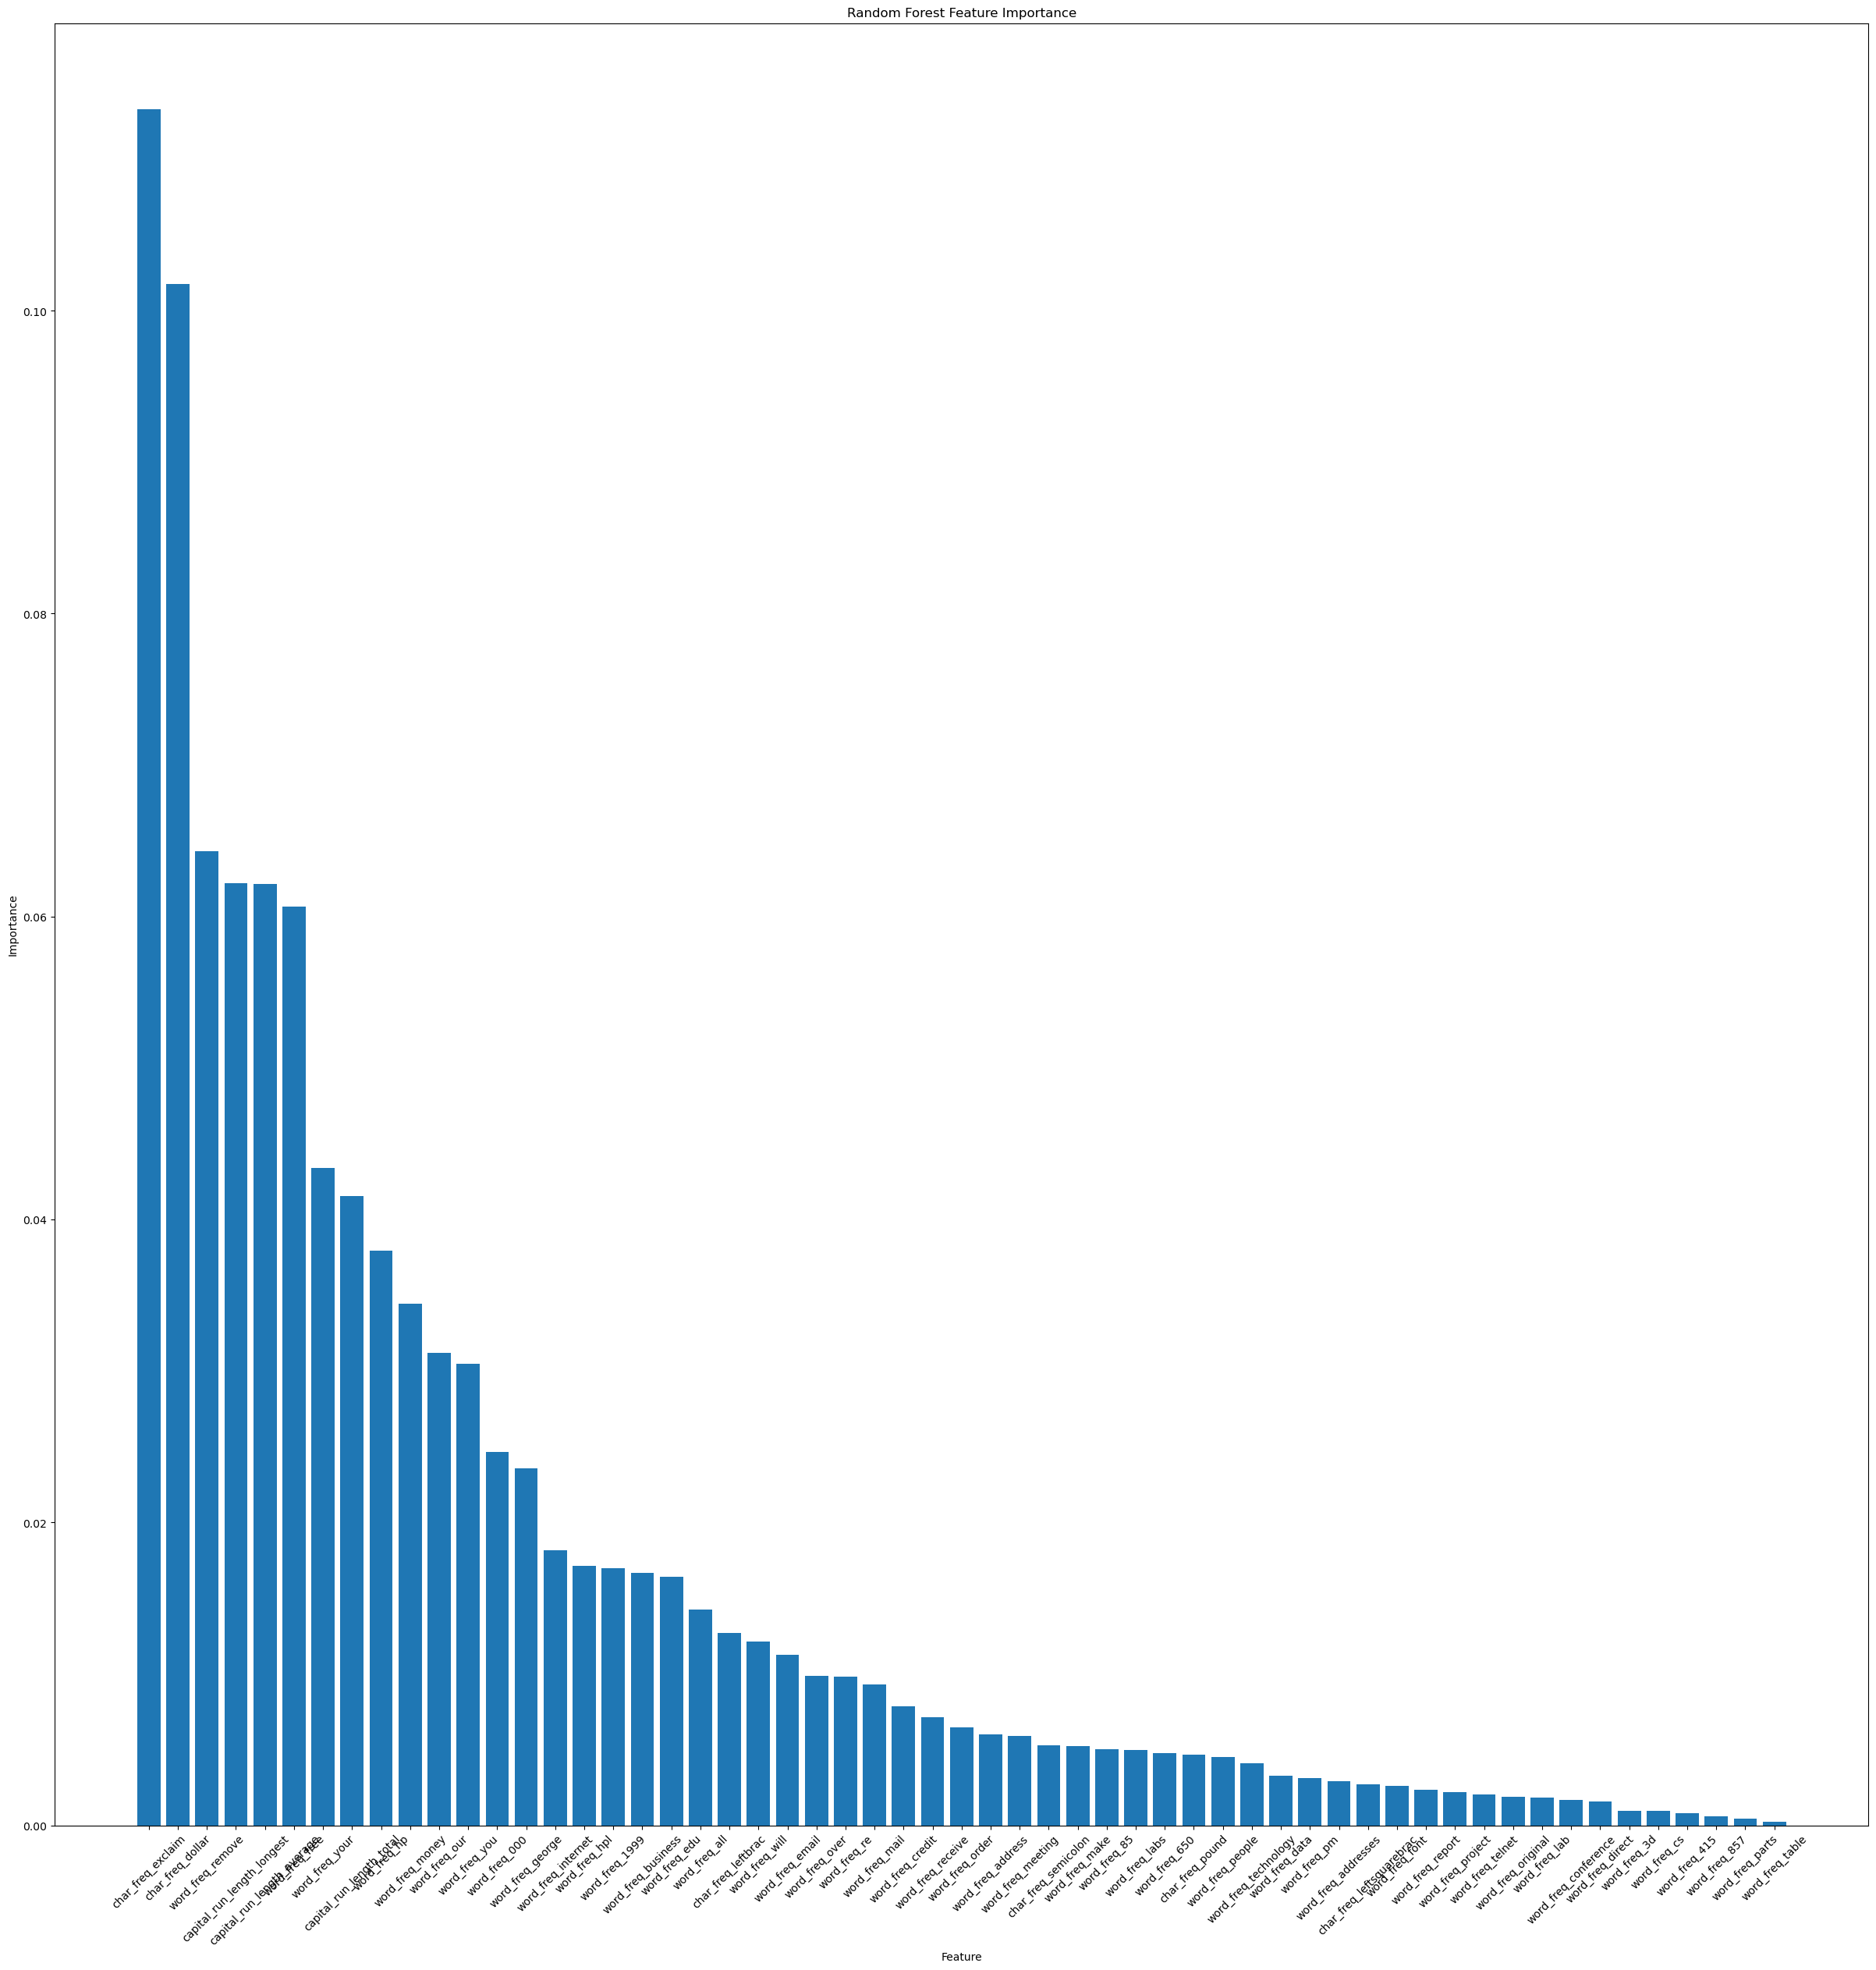

In [62]:
# Get feature importances
feature_importances = RF.feature_importances_

sorted_idx = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(30, 30))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


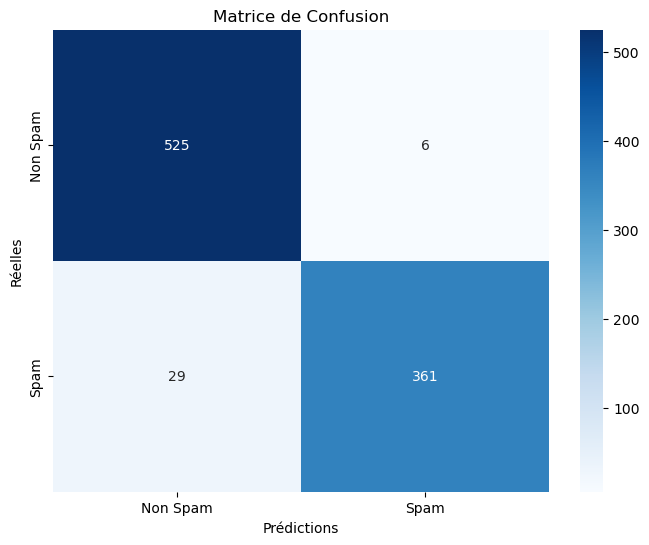

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       531
           1       0.95      0.90      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



In [63]:

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_predict)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Spam', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.title('Matrice de Confusion')
plt.show()

# On affiche le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

DNN

In [32]:
# On applique la mise à l'échelle des données
# en utilisant StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Create a directory for TensorBoard logs
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
# On construit un modèle séquentiel avec TensorFlow
# et Keras, comprenant deux couches cachées de 64 neurones
#activés par la fonction "relu", une couche de dropout de 0.5
#pour la régularisation, et une couche de sortie avec
# une activation "sigmoid" pour le modèle de classification binaire
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/10
26/26 [==============================] - 2s 24ms/step - loss: 0.5912 - accuracy: 0.7077 - val_loss: 0.4107 - val_accuracy: 0.8370
Epoch 2/10
26/26 [==============================] - 0s 12ms/step - loss: 0.4226 - accuracy: 0.8364 - val_loss: 0.3134 - val_accuracy: 0.8940
Epoch 3/10
26/26 [==============================] - 0s 12ms/step - loss: 0.3541 - accuracy: 0.8702 - val_loss: 0.2703 - val_accuracy: 0.8967
Epoch 4/10
26/26 [==============================] - 0s 12ms/step - loss: 0.3173 - accuracy: 0.8862 - val_loss: 0.2448 - val_accuracy: 0.9049
Epoch 5/10
26/26 [==============================] - 0s 15ms/step - loss: 0.2802 - accuracy: 0.9001 - val_loss: 0.2256 - val_accuracy: 0.9185
Epoch 6/10
26/26 [==============================] - 0s 13ms/step - loss: 0.2621 - accuracy: 0.9025 - val_loss: 0.2150 - val_accuracy: 0.9239
Epoch 7/10
26/26 [==============================] - 0s 13ms/step - loss: 0.2588 - accuracy: 0.9097 - val_loss: 0.2082 - val_accuracy: 0.9321
Epoch 8/10
26

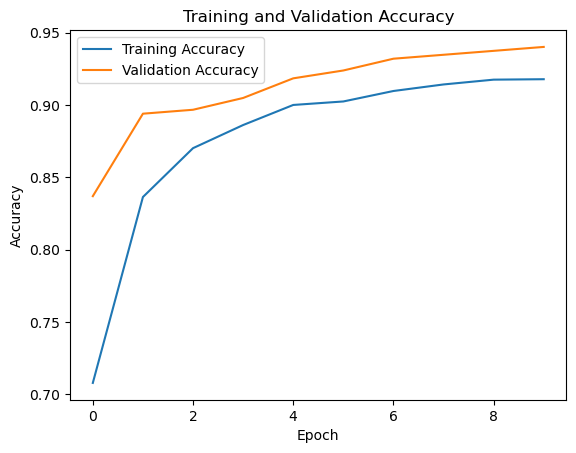

In [37]:
# Plot training and validation curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

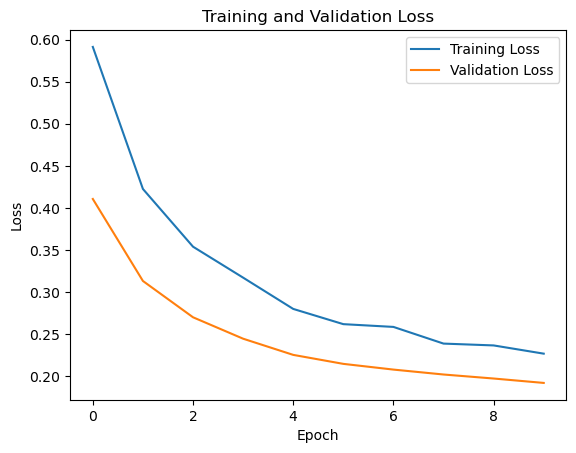

In [38]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

29/29 [==============================] - 0s 3ms/step


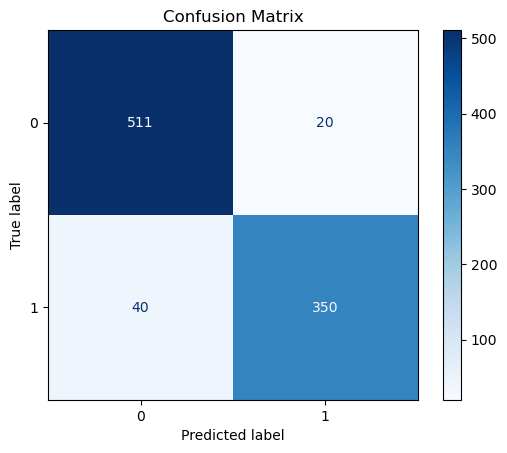

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       531
           1       0.95      0.90      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



In [39]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# On crée la matrice de confusion
cm = confusion_matrix(y_test, y_pred_binary)

# On l'affiche
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# On affiche le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))